In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler


c:\Users\Marsspi\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Read images and labels and reshape the numpy array for feeding sklearn

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
data = digits.images.reshape((len(digits.images), -1))
label = digits.target
print(data.shape)

(1797, 8, 8)
(1797, 64)


Split into test and train data, and scale them

In [3]:
seed = 19
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.5, random_state=seed)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
def ShowResult(y_train, y_test, y_pred_train, y_pred_test):    
    print('Error rate (train):', ((y_pred_train != y_train).sum()/len(y_train)*100).round(4), '%')
    print('Error rate (test):', ((y_pred_test != y_test).sum()/len(y_test)*100).round(4), '%')
    #print(classification_report(y_train, y_pred_train))
    print(classification_report(y_test, y_pred_test))
    #ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

Naive Bayes

Error rate (train): 10.3563 %
Error rate (test): 14.9055 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.78      0.74      0.76        85
           2       0.87      0.87      0.87        98
           3       0.79      0.84      0.81        92
           4       0.95      0.85      0.90        96
           5       0.88      0.91      0.89        92
           6       0.93      0.92      0.93        88
           7       0.74      0.99      0.85        91
           8       0.72      0.76      0.74        82
           9       0.93      0.67      0.78        99

    accuracy                           0.85       899
   macro avg       0.86      0.85      0.85       899
weighted avg       0.86      0.85      0.85       899



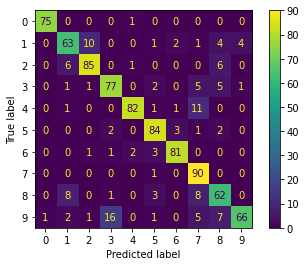

In [24]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

y_pred_train = clf_nb.predict(X_train)
y_pred_test = clf_nb.predict(X_test)

ShowResult(y_train, y_test, y_pred_train, y_pred_test)

Logistic regression

c:\Users\Marsspi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Error rate (train): 0.6682 %
Error rate (test): 5.228 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.87      0.94      0.90        85
           2       0.98      0.96      0.97        98
           3       0.99      0.88      0.93        92
           4       0.97      0.96      0.96        96
           5       0.94      0.99      0.96        92
           6       1.00      0.94      0.97        88
           7       0.95      0.96      0.95        91
           8       0.85      0.93      0.89        82
           9       0.96      0.94      0.95        99

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



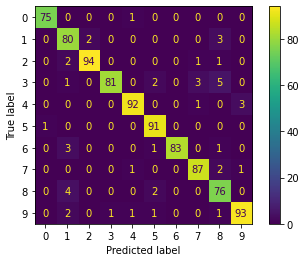

In [25]:
clf_lg = LogisticRegression(max_iter=100)
clf_lg.fit(X_train, y_train)

y_pred_train = clf_lg.predict(X_train)
y_pred_test = clf_lg.predict(X_test)

ShowResult(y_train, y_test, y_pred_train, y_pred_test)

Support vector machine

Error rate (train): 0.3341 %
Error rate (test): 2.3359 %
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.94      1.00      0.97        85
           2       1.00      0.99      0.99        98
           3       0.99      0.96      0.97        92
           4       0.99      0.98      0.98        96
           5       0.95      0.99      0.97        92
           6       1.00      0.97      0.98        88
           7       0.99      0.99      0.99        91
           8       0.93      0.96      0.95        82
           9       0.98      0.95      0.96        99

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



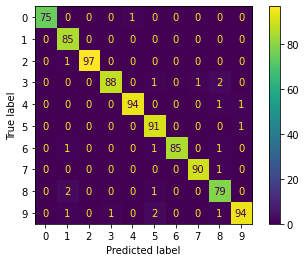

In [26]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

y_pred_train = clf_svm.predict(X_train)
y_pred_test = clf_svm.predict(X_test)

ShowResult(y_train, y_test, y_pred_train, y_pred_test)